# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The new format for the SAT was released in March 2016 and since then, we have collected data on the scores from each state in US, and their corresponding participation rates in 2017. Based on the general statistics of the said given data, a rough estimate on each state's performance and their participation rate will be used to determine how federal funding shall be allocated into each state, so as to increase the education standards of the whole country.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import matplotlib as plt
import numpy as np

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_df = pd.read_csv('../data/sat_2017.csv')
act_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

### ACT dataset:
---
For the ACT dataset, it is observed that there is an extra row within the dataset (National results). Upon inspection with a box plot, there is also an outlier within the science column. This has caused the skewness of the science to be extremely negative (-4.136).

Upon checking the datatypes of each labels too, the label of composite is specified as object, signifying that there might be a mix of integers and strings within the dataset. After inspection, it is found that for label composite, the last row has the integer mixed with a string 'x'. Furthermore, the data type of participation is not in float, and thus unable to be plotted.


### SAT dataset:
---
For the SAT dataset, the boxplot for Math, there also exist an outlier which is detected. The skewness due to this outlier, is therefore negatively skewed by -3.971.

Similarly, the participation column for SAT data is not in the proper data type of float (currently as object).

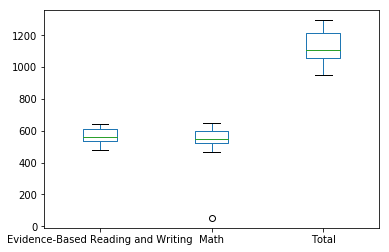

In [5]:
sat_df.plot.box()

In [6]:
act_df.skew()

English    0.370977
Math       0.349583
Reading    0.288556
Science   -4.136275
dtype: float64

In [7]:
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 4a. Does the data look complete? 

Answer: 

It can be observed that for both datasets, the number of counts for each of the subjects are all equal, thus there are no missing data. Furthermore, checking with code act_df.isnull().values.any() and sat_df.isnull().values.any() retuned False for both dataset. Thus, ensuring tat all fields are indeed filled up with a unique object.

However, erroneous data could still be found inside the dataset.

In [8]:
act_df.isnull().values.any()

False

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 

For SAT sections in ERW and Math, the minimum possible value is 200 while the maximum possible value is 800. In sum, the total scores minimum is 400 and maximum is 1600.

For ACT sections, the minimum possible is 1, while the maximum possible is 36 for all sections, including the composite scores.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

Based on the maximum and minimum possible values of SAT and ACT, it can be seen that there are outliers in the SAT math score (score of 52), which is outside of the possibility of 200. This can be fixed however, by using the total scores minusing the ERW scores to get the math score.

Furthermore, several of the scores do not tally, as ERW + math does not equal to total. Many of them are off by a little. Thus, after correcting for the outlier math score, the new total score can be tallied through addition from ERW and new math

As for the outlier in ACT science section, although the score if 2.3 is well below the mean, it still falls under the range of possible scores, and thus do not need to be treated as error. However, for further analysis, it would be better to exclude this outlier out for EDA.

In [9]:
sat_df.loc[20,'Math'] = 524
sat_df["New Total"] = sat_df['Math']+sat_df['Evidence-Based Reading and Writing']
sat_df = sat_df[['State','Participation','Evidence-Based Reading and Writing','Math','New Total']]

In [10]:
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,New Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1042
7,Delaware,100%,503,492,995
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
#code
print(sat_df.dtypes)
print('')
print(act_df.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
New Total                              int64
dtype: object

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:<br>
1) The dtype of composite in the act_df data is an object instead of float, as it is still a float score. <br>
2) For both participation columns in SAT and ACT dataset, the data type is objects instead of float. <br>
3) For both datasets, the state is in object instead of a string

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
#code
def p2f(x):
    return x.str.replace('%','').astype(float)/100

In [12]:
sat_df['Participation'] = p2f(sat_df['Participation'])


In [13]:
act_df['Participation'] = p2f(act_df['Participation'])

- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
#code
act_df['Composite'] = act_df['Composite'].str.replace('x', '')

In [15]:
#code
any(i.isalpha() for i in act_df['Composite'])  #Does not contain any characters


False

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
act_df['Composite'] = act_df['Composite'].astype(float)

- Display the data types again to confirm they are correct.

In [17]:
#Code:
print(sat_df.dtypes)
print('')
print(act_df.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
New Total                               int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
#code
sat17_df = sat_df.rename(columns={'Participation':'sat_17_participation',
                       'Evidence-Based Reading and Writing':'sat_17_erw',
                       'Math':'sat_17_math',
                      'New Total':'sat_17_total'})
act17_df = act_df.rename(columns={'Participation':'act_17_participation',
                       'English':'act_17_english',
                       'Math':'act_17_math',
                      'Reading':'act_17_reading',
                      'Science':'act_17_science',
                      'Composite':'act_17_composite'})

In [19]:
act17_df

,State,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|string|ACT/SAT|The list of states in United States of America (51, including District of Columbia)| 
|Participation|float|ACT/SAT|The percentage of high school graduate who takes the ACT/SAT test|
|Evidence-Based Reading and Writing (ERW) |integer|SAT|Score on Evidence-Based Reading and Writing (range from 200-800)|
|Math|integer|SAT|Score on Math (range from 200-800)|
|Total|integer|SAT|Sum of scores of ERW and Math (range from 400-1600)|
|English|float|ACT|Scaled score on English subject (range from 1-36)|
|Math|float|ACT|Scaled score on Math subject (range from 1-36)|
|Reading|float|ACT|Scaled score on Reading subject (range from 1-36)|
|Science|float|ACT|Scaled score on Science subject (range from 1-36)|
|Composite|float|ACT|Average of scaled scores on the 4 ACT subjects (English, Math, Reading, Science)|
|column_title_17/18|label|Combined|The year tag 2017 or 2018 depicting scores from 2017 or 2018|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
#code
#National row is included in the ACT dataset. Drop national row.
act17_df = act17_df[act17_df["State"]!="National"]

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
#Code:
combined_2017 = pd.merge(act17_df,sat17_df,how='inner',on="State")

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
#code
combined_2017.to_csv('..\data\combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:

sat18_df = pd.read_csv('../data/SAT_2018.csv')                               #Import all data and pandas read dataframe
act18_df = pd.read_csv('../data/ACT_2018.csv')

act18_df = act18_df[act18_df["State"]!="National"]                         #Removing National statistics from act 2018 series

act18_df['Participation'] = p2f(act18_df['Participation'])      #converting participation column from object to float using 
sat18_df['Participation'] = p2f(sat18_df['Participation'])      #previously defined p2f function

sat18_df = sat18_df.rename(columns={'Participation':'sat_18_participation',   #renaming columns for merging
                       'Evidence-Based Reading and Writing':'sat_18_erw',
                       'Math':'sat_18_math',
                      'Total':'sat_18_total'})
act18_df = act18_df.rename(columns={'Participation':'act_18_participation',
                       'English':'act_18_english',
                       'Math':'act_18_math',
                      'Reading':'act_18_reading',
                      'Science':'act_18_science',
                      'Composite':'act_18_composite'})

combined_2018 = pd.merge(act18_df,sat18_df,how='inner',on="State")          #merge 2018 dataset into combined

In [24]:
combined_2018.to_csv('..\data\combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [92]:
final = pd.merge(combined_2018,combined_2017,how='inner',on="State")

In [26]:
final.to_csv('..\data\Final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [93]:
#Code:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
act_18_participation,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0
act_18_composite,51.0,21.486275,2.106278,17.70,19.950,21.30,23.550,25.6
act_18_english,51.0,20.988235,2.446356,16.60,19.100,20.20,23.700,26.0
act_18_math,51.0,21.125490,2.035765,17.80,19.400,20.70,23.150,25.2
act_18_reading,51.0,22.015686,2.167245,18.00,20.450,21.60,24.100,26.1
act_18_science,51.0,21.345098,1.870114,17.90,19.850,21.10,23.050,24.9
sat_18_participation,51.0,0.466275,0.380142,0.02,0.045,0.52,0.795,1.0
sat_18_erw,51.0,566.980392,45.515927,497.00,534.500,552.00,616.500,643.0
sat_18_math,51.0,557.039216,49.065654,480.00,520.000,547.00,600.500,655.0
sat_18_total,51.0,1124.019608,94.277779,977.00,1057.500,1099.00,1220.000,1298.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [89]:
#code
def calc_stdev(x):
    total = 0
    sum_differences = 0
    for i in x:
        total += i
    mean = total/len(x)
    for j in x:
        differences = 0
        differences = (j - mean)**2
        sum_differences += differences
    stdev = (1/len(x) * sum_differences)**0.5         #    stdev = (1/(len(x)-1) * sum_differences)**0.5 for bessel's correction
    return stdev

In [94]:
calc_stdev(final['sat_17_total'])

91.57639048421622

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [108]:
#Code:
sd = {x:calc_stdev(final[x]) for x in final if x!='State'}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [109]:
sd

{'act_18_participation': 0.33745194881997503,
 'act_18_composite': 2.0855261815801147,
 'act_18_english': 2.4222536143202795,
 'act_18_math': 2.015707255555717,
 'act_18_reading': 2.145891884510421,
 'act_18_science': 1.8516885484833543,
 'sat_18_participation': 0.3763965409204987,
 'sat_18_erw': 45.067483254615375,
 'sat_18_math': 48.582237044495976,
 'sat_18_total': 93.34891120616042,
 'act_17_participation': 0.3182417575123181,
 'act_17_english': 2.3304876369363363,
 'act_17_math': 1.9624620273436781,
 'act_17_reading': 2.0469029314842646,
 'act_17_science': 3.1511078954644076,
 'act_17_composite': 2.000786081581989,
 'sat_17_participation': 0.3492907076664507,
 'sat_17_erw': 45.21697020437866,
 'sat_17_math': 46.65713364485503,
 'sat_17_total': 91.57639048421622}

Answer: <br>
No, the standard deviations do not match up. However, Numpy's std method also matches up. This is because the formula above does not correct for bessel's correction as the estimation of the population variance contains bias. Bessel's correction partially corrects the bias in the estimation of the population standard deviation by using n-1 instead of n instances only in pandas package.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT? 
    - 2018 SAT? 
    - 2017 ACT? 
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [131]:
#code

def find_lowest(participation):
    lowest = 1
    for i in participation:
        if i <= lowest:
            return

    

,State,act_18_participation,act_18_composite,act_18_english,act_18_math,act_18_reading,act_18_science,sat_18_participation,sat_18_erw,sat_18_math,...,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0,0.06,595,571,...,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
17,Kentucky,1.00,20.2,19.9,19.7,20.8,20.1,0.04,630,618,...,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247
49,Wisconsin,1.00,20.5,19.8,20.3,20.6,20.8,0.03,641,653,...,1.00,19.7,20.4,20.6,20.9,20.5,0.03,642,649,1291
44,Utah,1.00,20.4,19.7,19.9,20.9,20.5,0.04,618,612,...,1.00,19.5,19.9,20.8,20.6,20.3,0.03,624,614,1238
42,Tennessee,1.00,19.6,19.4,19.1,19.9,19.6,0.06,624,607,...,1.00,19.5,19.2,20.1,19.9,19.8,0.05,623,604,1227
40,South Carolina,1.00,18.3,17.3,18.2,18.6,18.5,0.55,531,512,...,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064
36,Oklahoma,1.00,19.3,18.4,18.8,20.1,19.4,0.08,541,521,...,1.00,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047
33,North Carolina,1.00,19.1,18.0,19.3,19.5,19.2,0.52,554,543,...,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081
28,Nevada,1.00,17.7,16.6,17.8,18.0,17.9,0.23,574,566,...,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116
26,Montana,1.00,20.0,18.7,19.9,20.7,20.0,0.10,606,592,...,1.00,19.0,20.2,21.0,20.5,20.3,0.10,605,591,1196


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [ ]:
# Code

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
# Code

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?